# Exploratory Data Analysis (EDA) (Neksha VinodBhai Patel)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("count_by_all_dimensions_for_high_level_model_v2.csv")
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63


In [4]:
healthy_cols = []
nursing_cols = []
poor_health_cols = []
hhc_cols = []

for col in data.columns:
    if "Good Health to" in col:
        healthy_cols.append(col)
        continue
    if "NH to" in col:
        nursing_cols.append(col)
        continue
    if "Poor Health to" in col:
        poor_health_cols.append(col)
        continue
    if "HHC to" in col:
        hhc_cols.append(col)
        continue

In [6]:
healthy_count = 0
nursing_count = 0
poor_health_count = 0
hhc_count = 0
dead_count = 0

for col in data.columns:
    if col in healthy_cols:
        healthy_count += data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count += data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count += data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count += data[col].sum()
        continue
    if "Dead to" in col:
        dead_count += data[col].sum()

[Text(0.5, 1.0, 'Health state distribution'),
 Text(0.5, 0, 'Health state'),
 Text(0, 0.5, 'Number of individuals')]

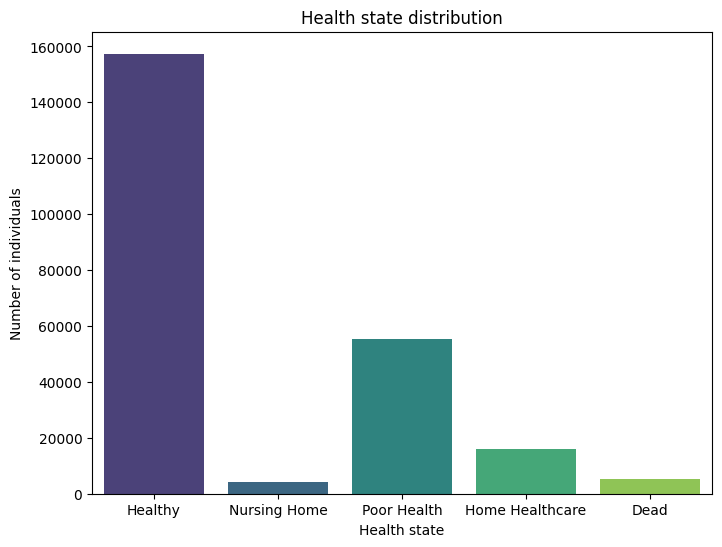

In [47]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes = [healthy_count,nursing_count,poor_health_count,hhc_count,dead_count]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x = labels, y = sizes, hue=labels, legend=False,palette='viridis', ax=ax).set(title='Health state distribution',
                                                                                         xlabel='Health state',ylabel='Number of individuals')

The visualization above represents the division of the health states based on the total number of individuals

Insight:
    

In [37]:
male_data = data[data['Gender']=='1.male']
female_data = data[data['Gender']=='2.female']

male_count = 0
female_count = 0

for col in male_data.columns:
    if col in healthy_cols:
        male_count+=male_data[col].sum()
    if col in nursing_cols:
        male_count+=male_data[col].sum()
    if col in poor_health_cols:
        male_count+=male_data[col].sum()
    if col in hhc_cols:
        male_count+=male_data[col].sum()
    if "Dead to" in col:
        male_count+=male_data[col].sum()

for col in female_data.columns:
    if col in healthy_cols:
        female_count+=female_data[col].sum()
    if col in nursing_cols:
        female_count+=female_data[col].sum()
    if col in poor_health_cols:
        female_count+=female_data[col].sum()
    if col in hhc_cols:
        female_count+=female_data[col].sum()
    if "Dead to" in col:
        female_count+=female_data[col].sum()

print(male_count)
print(female_count)

101009
137349


[Text(0.5, 1.0, 'Gender distribution'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Number of individuals')]

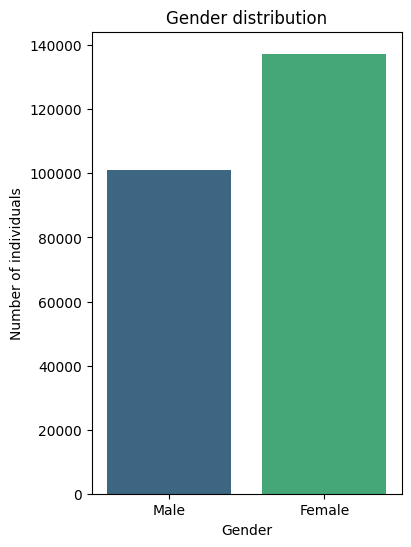

In [41]:
labels = ['Male','Female']
sizes = [male_count, female_count]

fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x = labels, y = sizes, hue=labels, legend=False,palette='viridis', ax=ax).set(title='Gender distribution',
                                                                                         xlabel='Gender',ylabel='Number of individuals')

The visualization above represents the gender distribution between male and female based on the Number of individuals

Insight:

In [42]:
age_groups = ['50-59','60-69','70-79','80-89','90-99']
age_groups_counts = [0,0,0,0,0]

data_groups = []
data_groups.append(data[(data['Age']>49) & (data['Age']<60)])
data_groups.append(data[(data['Age']>59) & (data['Age']<70)])
data_groups.append(data[(data['Age']>69) & (data['Age']<80)])
data_groups.append(data[(data['Age']>79) & (data['Age']<90)])
data_groups.append(data[(data['Age']>89) & (data['Age']<100)])

In [44]:
for i in range(5):
    for col in data_groups[i].columns:
        if col in healthy_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if col in nursing_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if col in poor_health_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if col in hhc_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if "Dead to" in col:
            age_groups_counts[i]+=data_groups[i][col].sum()

[Text(0.5, 1.0, 'Age distribution'),
 Text(0.5, 0, 'Age ranges'),
 Text(0, 0.5, 'Number of individuals')]

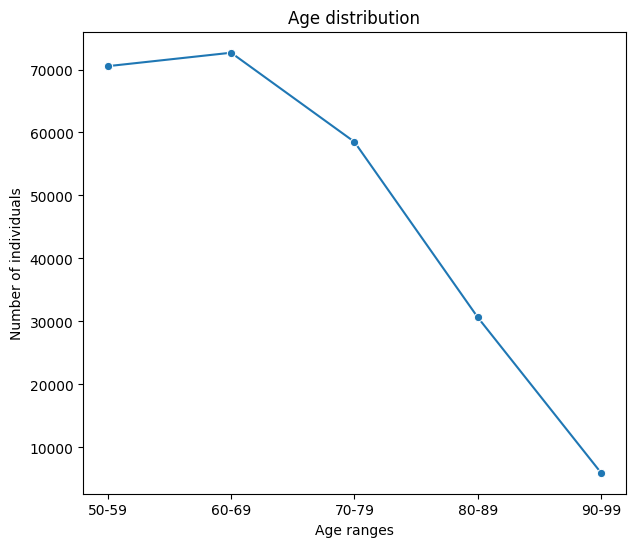

In [62]:
labels = age_groups
sizes = age_groups_counts

fig, ax = plt.subplots(figsize=(7, 6))
sns.lineplot(x = labels, y = sizes,style=1,legend=False, markers=True).set(title='Age distribution',
                                                                                         xlabel='Age ranges',ylabel='Number of individuals')

The ab

Insight:

In [63]:
age_groups_counts_male = [0,0,0,0,0]

data_groups_male = []
data_groups_male.append(male_data[(male_data['Age']>49) & (male_data['Age']<60)])
data_groups_male.append(male_data[(male_data['Age']>59) & (male_data['Age']<70)])
data_groups_male.append(male_data[(male_data['Age']>69) & (male_data['Age']<80)])
data_groups_male.append(male_data[(male_data['Age']>79) & (male_data['Age']<90)])
data_groups_male.append(male_data[(male_data['Age']>89) & (male_data['Age']<100)])

for i in range(5):
    for col in data_groups_male[i].columns:
        if col in healthy_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if col in nursing_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if col in poor_health_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if col in hhc_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if "Dead to" in col:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()

In [64]:
age_groups_counts_female = [0,0,0,0,0]

data_groups_female = []
data_groups_female.append(female_data[(female_data['Age']>49) & (female_data['Age']<60)])
data_groups_female.append(female_data[(female_data['Age']>59) & (female_data['Age']<70)])
data_groups_female.append(female_data[(female_data['Age']>69) & (female_data['Age']<80)])
data_groups_female.append(female_data[(female_data['Age']>79) & (female_data['Age']<90)])
data_groups_female.append(female_data[(female_data['Age']>89) & (female_data['Age']<100)])

for i in range(5):
    for col in data_groups_female[i].columns:
        if col in healthy_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if col in nursing_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if col in poor_health_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if col in hhc_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if "Dead to" in col:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()

Visualizations:<br>
Distribution of data based on gender (Neksha Vinodbhai Patel)

[Text(0.5, 1.0, 'Age distribution by gender'),
 Text(0.5, 0, 'Age groups'),
 Text(0, 0.5, 'Number of individuals')]

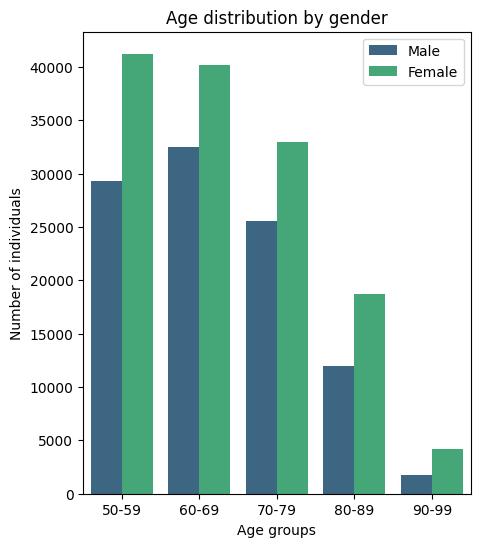

In [69]:
labels = age_groups+age_groups
sizes = age_groups_counts_male+age_groups_counts_female
hue = ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female']

fig, ax = plt.subplots(figsize=(5, 6))

sns.barplot(x = labels, y = sizes, hue=hue,palette='viridis', ax=ax).set(title='Age distribution by gender',
                                                                                         xlabel='Age groups',ylabel='Number of individuals')

In every age group, the number of females in the dataset is higher than the number of males.

In [70]:
healthy_count_male = 0
nursing_count_male = 0
poor_health_count_male = 0
hhc_count_male = 0
dead_count_male = 0

healthy_count_female = 0
nursing_count_female = 0
poor_health_count_female = 0
hhc_count_female = 0
dead_count_female = 0



for col in data.columns:
    if col in healthy_cols:
        healthy_count_male += male_data[col].sum()
        healthy_count_female += female_data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count_male += male_data[col].sum()
        nursing_count_female += female_data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count_male += male_data[col].sum()
        poor_health_count_female += female_data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count_male += male_data[col].sum()
        hhc_count_female += female_data[col].sum()
        continue
    if "Dead to" in col:
        dead_count_male += male_data[col].sum()
        dead_count_female += female_data[col].sum()

[Text(0.5, 1.0, 'Health state distribution by Gender'),
 Text(0.5, 0, 'Health state'),
 Text(0, 0.5, 'Number of individuals')]

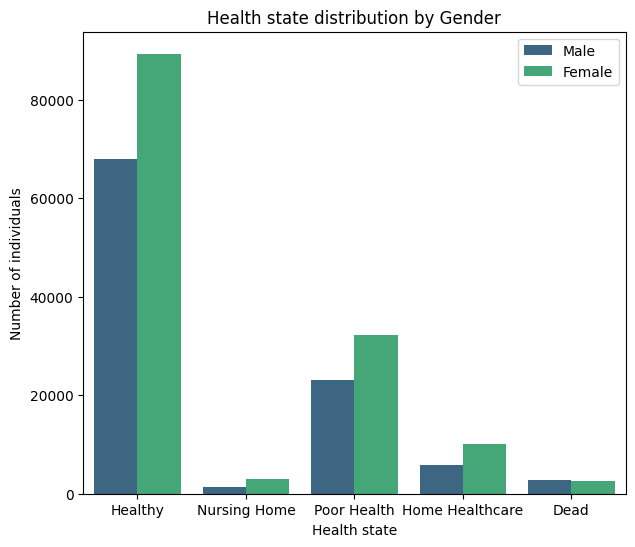

In [75]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead','Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
male_counts_health = [healthy_count_male,nursing_count_male,poor_health_count_male,hhc_count_male,dead_count_male]
female_counts_health = [healthy_count_female,nursing_count_female,poor_health_count_female,hhc_count_female,dead_count_female]
sizes = male_counts_health+female_counts_health
hue = ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female']

fig, ax = plt.subplots(figsize=(7, 6))
sns.barplot(x = labels, y = sizes, hue=hue,palette='viridis', ax=ax).set(title='Health state distribution by Gender',
                                                                                         xlabel='Health state',ylabel='Number of individuals')

The visualization represents the gender distribution combined with the health states taken from the total number of individuals